In [21]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.python.keras import layers, models
from utils import *
from image_processing import *
from sklearn.metrics import confusion_matrix
import seaborn as sns


# ensure consistency across runs
from numpy.random import seed
seed(1)

# Get mnist Data from tf 
#### split train to _train, _validation 

In [22]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
(x_validation, y_validation) = (x_train[50000:-1], y_train[50000:-1])
(x_train, y_train) = (x_train[0:50000], y_train[0:50000])

histogram - label -train


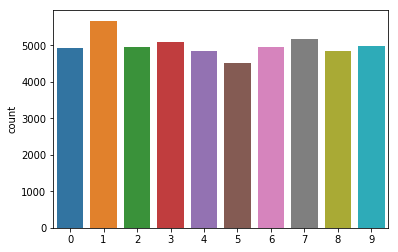

In [23]:
print("histogram - label -train")
g = sns.countplot(y_train)


### show samples data 

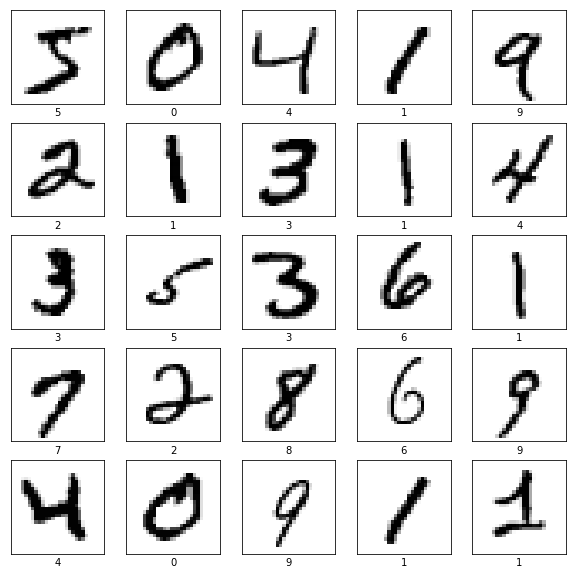

In [24]:
get_sample_data(x_train, y_train)

### show sample data after using Image_generator augument 

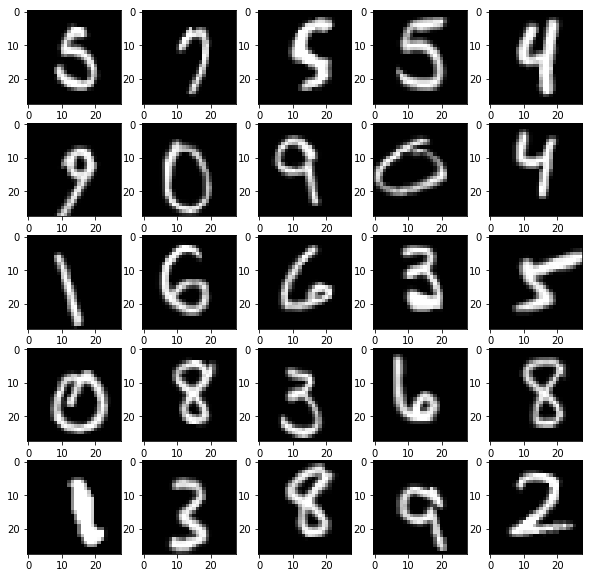

In [25]:
sample_data = datagen.flow(preprocessing_data(x_validation[0:30]), y_validation[0:30], 30,subset='training')
show_sample_generator(sample_data)
# print("[INFO] generating images...")


# Create light model for defference training usecases

In [26]:
light_model = get_light_model(image_size = (28,28,1))
light_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 12, 12, 32)        128       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 10, 10, 128)       36992     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 8, 8, 128)         147584    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 4, 4, 128)         0         
__________

# START - Working on default data 
## preprocessing data 
#### reshape
#### norm value to [0->1] by //255


# subsample = 10% data

In [27]:
subsamples = 0.1
if(subsamples >1):
    raise ValueError(" subsamples less than 1")
# data
x_df_train = preprocessing_data(x_train[0:int(x_train.shape[0]* subsamples)])
x_df_validation = preprocessing_data(x_validation[0: int(x_validation.shape[0]* subsamples)]) 
x_df_test = preprocessing_data(x_test)

# label
y_df_train = y_train[0:int(y_train.shape[0]* subsamples)]
y_df_validation = y_validation[0: int(x_validation.shape[0]* subsamples)] 
y_df_test= y_test

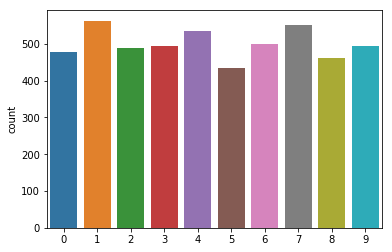

In [29]:
g = sns.countplot(y_df_train)


#### training without generator method 
##### param:        
        optimizer="adam",
        loss_function="sparse_categorical_crossentropy",
        metrics=["accuracy"]

In [31]:
# training on subsamples
model_df, history_df= train(model = light_model, 
                            train_images= x_df_train, train_labels= y_df_train,
                            evaluate_images=x_df_validation, evaluate_labels=y_df_validation,
                            batch_size=256,
                            epochs=10)

Train on 5000 samples, validate on 999 samples
Epoch 1/10
5000/5000 [==============================] - 24s 5ms/step - loss: 0.4838 - acc: 0.8514 - val_loss: 2.0395 - val_acc: 0.2863
Epoch 2/10
5000/5000 [==============================] - 27s 5ms/step - loss: 0.0716 - acc: 0.9790 - val_loss: 2.2200 - val_acc: 0.1071
Epoch 3/10
5000/5000 [==============================] - 23s 5ms/step - loss: 0.0257 - acc: 0.9930 - val_loss: 2.9707 - val_acc: 0.1071
Epoch 4/10
5000/5000 [==============================] - 23s 5ms/step - loss: 0.0129 - acc: 0.9980 - val_loss: 3.2510 - val_acc: 0.1071
Epoch 5/10
5000/5000 [==============================] - 23s 5ms/step - loss: 0.0069 - acc: 0.9992 - val_loss: 4.4140 - val_acc: 0.1071
Epoch 6/10
5000/5000 [==============================] - 22s 4ms/step - loss: 0.0030 - acc: 1.0000 - val_loss: 4.7763 - val_acc: 0.1071
Epoch 7/10
5000/5000 [==============================] - 25s 5ms/step - loss: 0.0019 - acc: 1.0000 - val_loss: 5.0680 - val_acc: 0.1071
Epoch 8/

10000/10000 [==============================] - 11s 1ms/step
	test loss, test acc: [5.969830575561524, 0.1135]


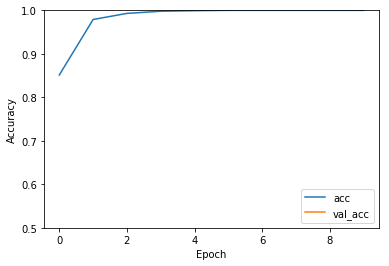

In [33]:
show_history(history_df)
result = model_df.evaluate(x_df_test, y_df_test)
print('\ttest loss, test acc:', result)

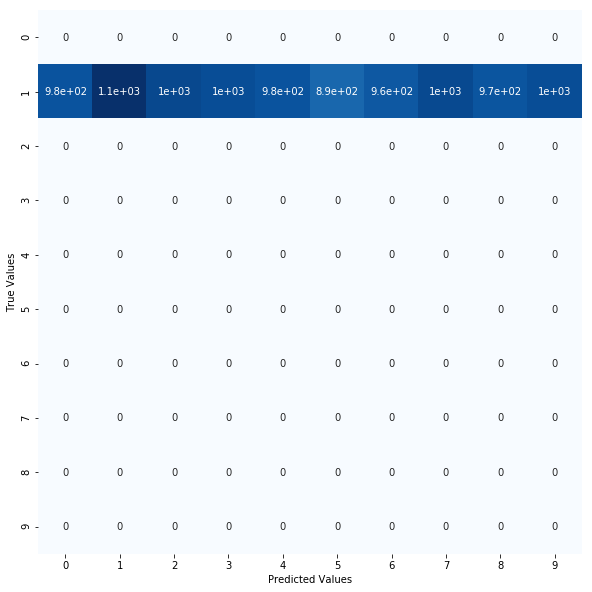

In [34]:
y_pred =  model_df.predict(preprocessing_data(x_test))
confussion_matrix(y_test, y_pred)

#### overfitting when train and evaluate on 10% data 

## Training on full data

In [38]:
# full_data (50000) records
model_full_data, history_full_data = train(model = light_model, 
                            train_images= preprocessing_data(x_train), train_labels= y_train,
                            evaluate_images=preprocessing_data(x_validation), evaluate_labels=y_validation,
                            batch_size=256,
                            epochs=10)

Train on 50000 samples, validate on 9999 samples
Epoch 1/10
50000/50000 [==============================] - 256s 5ms/step - loss: 0.0623 - acc: 0.9814 - val_loss: 0.3957 - val_acc: 0.8632
Epoch 2/10
50000/50000 [==============================] - 279s 6ms/step - loss: 0.0300 - acc: 0.9906 - val_loss: 0.0651 - val_acc: 0.9835
Epoch 3/10
50000/50000 [==============================] - 294s 6ms/step - loss: 0.0222 - acc: 0.9932 - val_loss: 0.0351 - val_acc: 0.9894
Epoch 4/10
50000/50000 [==============================] - 330s 7ms/step - loss: 0.0157 - acc: 0.9949 - val_loss: 0.0443 - val_acc: 0.9896
Epoch 5/10
50000/50000 [==============================] - 265s 5ms/step - loss: 0.0128 - acc: 0.9957 - val_loss: 0.0382 - val_acc: 0.9908
Epoch 6/10
50000/50000 [==============================] - 234s 5ms/step - loss: 0.0097 - acc: 0.9967 - val_loss: 0.0463 - val_acc: 0.9894
Epoch 7/10
50000/50000 [==============================] - 195s 4ms/step - loss: 0.0080 - acc: 0.9973 - val_loss: 0.0345 - v

In [39]:
# save weight
model_full_data.save("/home/shjfu/vinid/weight_cnn/full_default_param.h5")

In [40]:
# load weight
model_full_data = tf.keras.models.load_model("/home/shjfu/vinid/weight_cnn/full_default_param.h5")

#### show history training and validating data

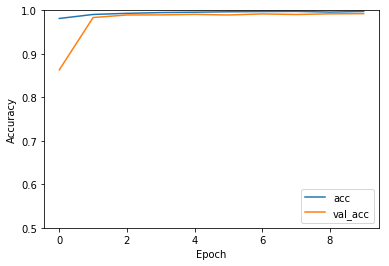

In [41]:
show_history(history_full_data)


In [42]:
result = model_df.evaluate(x_df_test, y_test)
print('\ttest loss, test acc:', result)


10000/10000 [==============================] - 11s 1ms/step
	test loss, test acc: [0.03683609632771113, 0.9917]


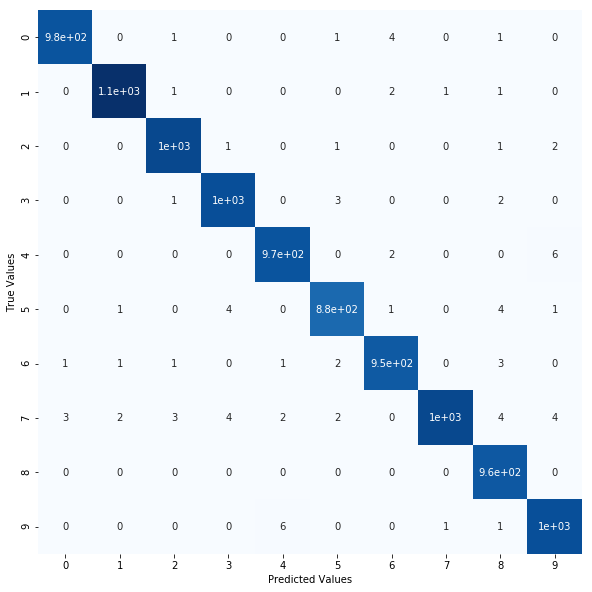

In [43]:
y_pred =  model_df.predict(preprocessing_data(x_test))
confussion_matrix(y_test, y_pred)

# END  - Working on default data 

In [45]:
# test loss, test acc: [0.03683609632771113, 0.9917]
# overfitting when working on 10% data 

# START - training and using generator images

# subsampling 10%

# using ImageGenerator method [data augmentation techniques]

In [46]:
model_generator_df, history_generator_df = train_generator(light_model, 
                             train_images = x_df_train, train_labels = y_df_train, 
                             validation_images= x_df_validation,validation_labels=y_df_validation,
                             batch_size=256, epochs = 10, verbose = 1)
# show_history(history_v1)

Epoch 1/10
19/19 [==============================] - 17s 894ms/step - loss: 0.1126 - acc: 0.9707
Epoch 2/10
19/19 [==============================] - 21s 1s/step - loss: 0.0733 - acc: 0.9799
Epoch 3/10
19/19 [==============================] - 17s 915ms/step - loss: 0.0565 - acc: 0.9851
Epoch 4/10
19/19 [==============================] - 28s 1s/step - loss: 0.0426 - acc: 0.9881
Epoch 5/10
19/19 [==============================] - 32s 2s/step - loss: 0.0270 - acc: 0.9889
Epoch 6/10
19/19 [==============================] - 33s 2s/step - loss: 0.0317 - acc: 0.9905
Epoch 7/10
19/19 [==============================] - 30s 2s/step - loss: 0.0255 - acc: 0.9918
Epoch 8/10
19/19 [==============================] - 33s 2s/step - loss: 0.0207 - acc: 0.9938
Epoch 9/10
19/19 [==============================] - 33s 2s/step - loss: 0.0197 - acc: 0.9928
Epoch 10/10
19/19 [==============================] - 35s 2s/step - loss: 0.0168 - acc: 0.9955


10000/10000 [==============================] - 11s 1ms/step
	test loss, test acc: [0.0344622265761951, 0.9907]


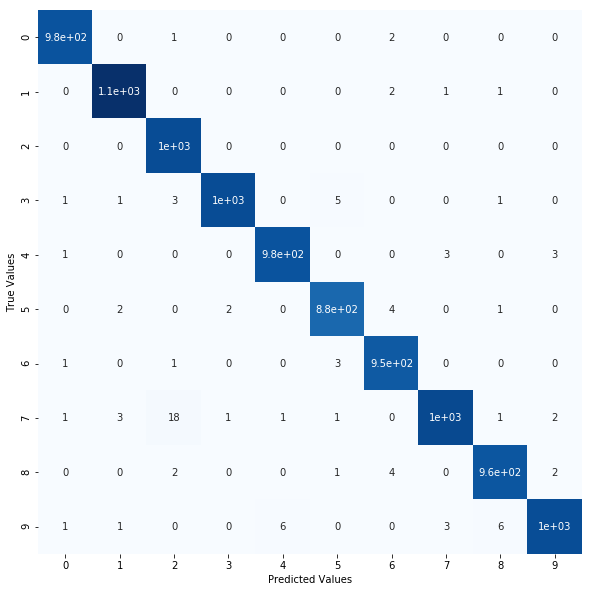

In [48]:
result = model_generator_df.evaluate(x_df_test, y_test)
print('\ttest loss, test acc:', result)

results = model_generator_df.predict(x_df_test)
# print('test loss, test acc:', results)
confussion_matrix(y_test, results)


In [49]:
# using generator and diference 
list_loss_function = ["sparse_categorical_crossentropy"]
list_optimizer = ["adamax","adam", "adadelta", "sgd"]

---- START -----
	model training with loss_function: sparse_categorical_crossentropy
	model training optimizer: adamax
Epoch 1/10
 - 27s - loss: 0.0126 - acc: 0.9968
Epoch 2/10
 - 17s - loss: 0.0045 - acc: 0.9981
Epoch 3/10
 - 17s - loss: 0.0055 - acc: 0.9984
Epoch 4/10
 - 16s - loss: 0.0104 - acc: 0.9968
Epoch 5/10
 - 17s - loss: 0.0060 - acc: 0.9975
Epoch 6/10
 - 18s - loss: 0.0062 - acc: 0.9988
Epoch 7/10
 - 18s - loss: 0.0030 - acc: 0.9988
Epoch 8/10
 - 20s - loss: 0.0058 - acc: 0.9976
Epoch 9/10
 - 20s - loss: 0.0040 - acc: 0.9981
Epoch 10/10
 - 22s - loss: 0.0028 - acc: 0.9994
10000/10000 [==============================] - 14s 1ms/step
	test loss, test acc: [0.03628536689557223, 0.9924]


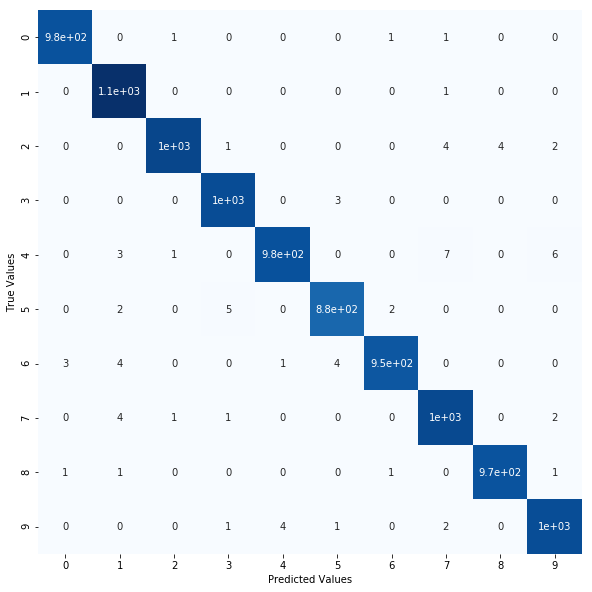

------ END -------
---- START -----
	model training with loss_function: sparse_categorical_crossentropy
	model training optimizer: adam
Epoch 1/10
 - 18s - loss: 0.0081 - acc: 0.9975
Epoch 2/10
 - 17s - loss: 0.0125 - acc: 0.9961
Epoch 3/10
 - 17s - loss: 0.0160 - acc: 0.9959
Epoch 4/10
 - 18s - loss: 0.0159 - acc: 0.9955
Epoch 5/10
 - 17s - loss: 0.0091 - acc: 0.9969
Epoch 6/10
 - 18s - loss: 0.0198 - acc: 0.9931
Epoch 7/10
 - 18s - loss: 0.0111 - acc: 0.9967
Epoch 8/10
 - 17s - loss: 0.0134 - acc: 0.9949
Epoch 9/10
 - 17s - loss: 0.0149 - acc: 0.9955
Epoch 10/10
 - 17s - loss: 0.0133 - acc: 0.9949
10000/10000 [==============================] - 11s 1ms/step
	test loss, test acc: [0.2353774116072662, 0.9664]


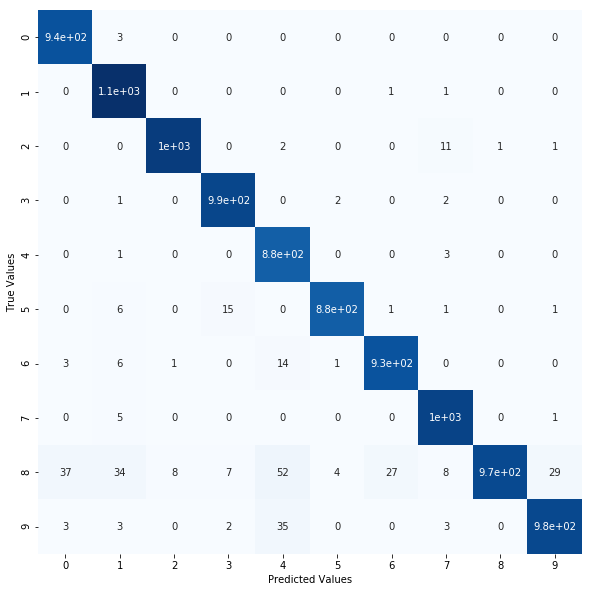

------ END -------
---- START -----
	model training with loss_function: sparse_categorical_crossentropy
	model training optimizer: adadelta
Epoch 1/10
 - 20s - loss: 0.0102 - acc: 0.9971
Epoch 2/10
 - 18s - loss: 0.0071 - acc: 0.9978
Epoch 3/10
 - 35s - loss: 0.0027 - acc: 0.9992
Epoch 4/10
 - 42s - loss: 0.0031 - acc: 0.9990
Epoch 5/10
 - 35s - loss: 0.0035 - acc: 0.9992
Epoch 6/10
 - 35s - loss: 0.0025 - acc: 0.9992
Epoch 7/10
 - 34s - loss: 0.0034 - acc: 0.9994
Epoch 8/10
 - 32s - loss: 0.0023 - acc: 0.9992
Epoch 9/10
 - 37s - loss: 0.0014 - acc: 0.9996
Epoch 10/10
 - 34s - loss: 0.0048 - acc: 0.9992
10000/10000 [==============================] - 21s 2ms/step
	test loss, test acc: [0.03540254685914551, 0.9916]


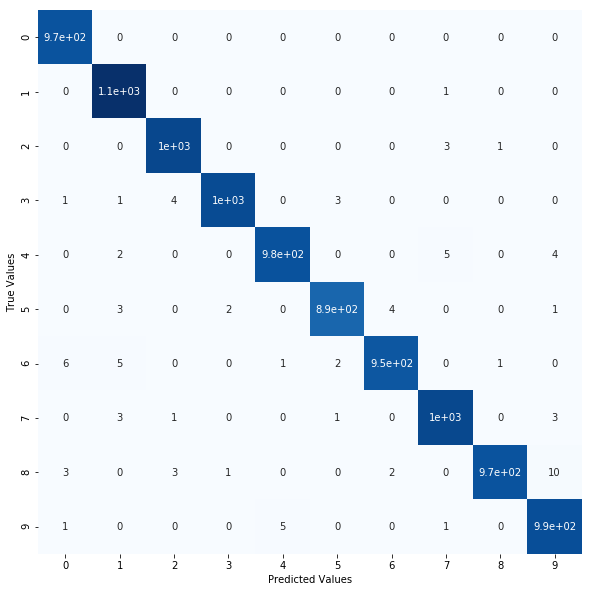

------ END -------
---- START -----
	model training with loss_function: sparse_categorical_crossentropy
	model training optimizer: sgd
Epoch 1/10
 - 37s - loss: 0.0037 - acc: 0.9994
Epoch 2/10
 - 34s - loss: 0.0027 - acc: 0.9992
Epoch 3/10
 - 34s - loss: 0.0031 - acc: 0.9994
Epoch 4/10
 - 33s - loss: 0.0034 - acc: 0.9994
Epoch 5/10
 - 35s - loss: 0.0011 - acc: 0.9998
Epoch 6/10
 - 34s - loss: 0.0013 - acc: 0.9994
Epoch 7/10
 - 20s - loss: 0.0017 - acc: 0.9994
Epoch 8/10
 - 20s - loss: 0.0036 - acc: 0.9984
Epoch 9/10
 - 19s - loss: 5.6946e-04 - acc: 0.9998
Epoch 10/10
 - 20s - loss: 0.0017 - acc: 0.9992
10000/10000 [==============================] - 27s 3ms/step
	test loss, test acc: [0.03867420456566797, 0.9908]


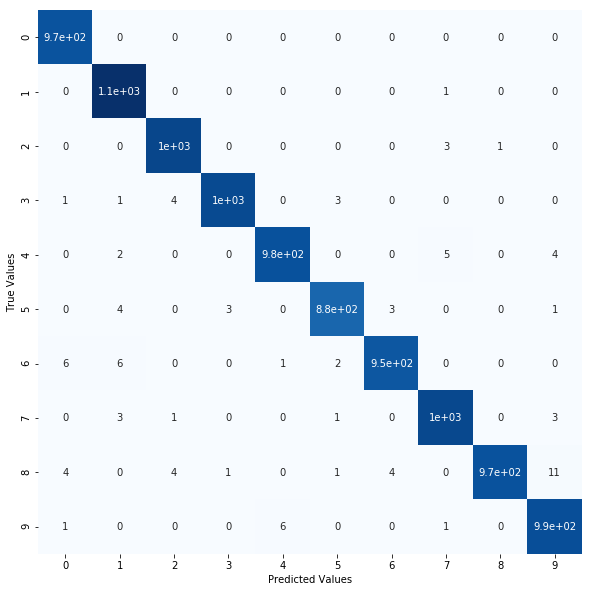

------ END -------


In [54]:
for loss_function in list_loss_function:
    for optimizer in list_optimizer:
        print("---- START -----")
        print("\tmodel training with loss_function: " + loss_function)
        print("\tmodel training optimizer: " + optimizer)
        model,history = train_generator(light_model,
                                train_images = x_df_train, train_labels = y_df_train,
                                validation_images= x_df_validation,validation_labels=y_df_validation,
                                batch_size=256, epochs = 10, verbose = 2, 
                                optimizer=optimizer, loss_function=loss_function)
        model.save("/home/shjfu/vinid/weight_cnn/param_%s_%s.h5"%(loss_function,optimizer))
        results = model.evaluate(x_df_test,y_test)
        print('\ttest loss, test acc:', results)
        results = model_generator_df.predict(x_df_test)
        # print('test loss, test acc:', results)
        confussion_matrix(y_test, results)
        print("------ END -------")
        


In [ ]:
# loss function: sparse_categorical_crossentropy, optimizer: sgd
# test loss, test acc: [0.03547044820197007, 0.9908]

# same loss function: sparse_categorical_crossentropy
# three optimizers get high accuracy 
    #(The accuracy can be defined as the percentage of correctly classified instances 
    #(TP + TN)/(TP + TN + FP + FN). 
    #where TP, FN, FP and TN represent the number of true positives, 
    #false negatives, false positives and true negatives, respectively.)
# optimizer: 
    # adamax best on   train: 0.9994 test: 0.9924
    # adam best on     train: 0.9949 test: 0.9664
    # adadelta best on train: 0.9992 test: 0.9916
    # sgd best on      train: 0.9998 test: 0.9908
    
# get more accuray on train full data. still using 10% data for traing

In [58]:
# test model
model_sgd = tf.keras.models.load_model("/home/shjfu/vinid/weight_cnn/param_sparse_categorical_crossentropy_sgd.h5")

prediction_25_images = np.argmax(model_sgd.predict(preprocessing_data(x_test[0:25])),1)

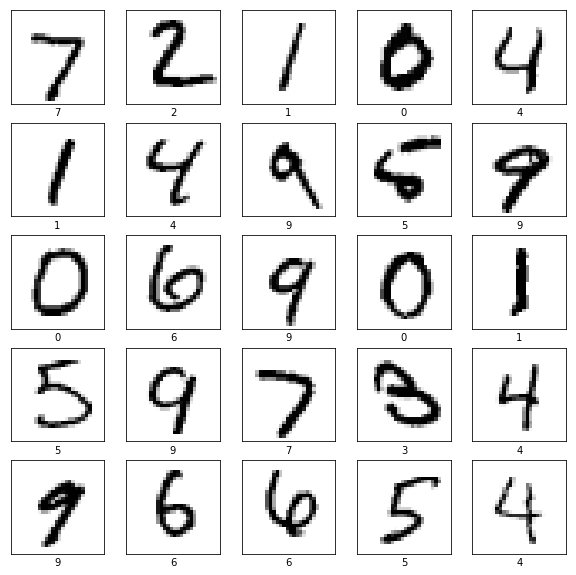

In [59]:
# show samples data
get_sample_data(x_test[0:25], prediction_25_images)

In [62]:
# beside that, I have another model for auto generate data using GAN algorithm. training on GPU of kaggle
# code training store on code based
# futures: fake data for training: if the samples not enough for training, m
# using another loss_function but this problem is not diffecute so change method (loss function or optimizer), it does not difference more 

# weight at 200th epoch:
# how to use generator model from GAN model 
# i followed by https://machinelearningmastery.com/how-to-develop-a-generative-adversarial-network-for-an-mnist-handwritten-digits-from-scratch-in-keras/
from gan_generator import * 
read_model = define_generator_model(300)

In [63]:
read_model.load_weights("/home/shjfu/vinid/generator_model/generator_model_200.h5")

In [72]:
latent_points = generate_latent_points(latent_dim=300,numb_samples=50)

In [73]:
example = read_model.predict(latent_points)

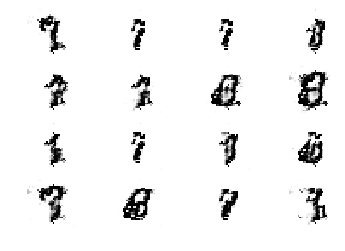

In [78]:
def save_plot(examples, n):
    for i in range(n * n):
        plt.subplot(n, n, 1 + i)
        plt.axis('off')
        plt.imshow(examples[i, :, :, 0], cmap='gray_r')
    plt.show()

save_plot(examples=example, n = 4)